In [ ]:
!pip install minisom

4422102/4422102 [==============================] - 0s 0us/step
[BernoulliRBM] Iteration 1, pseudo-likelihood = -227.69, time = 56.43s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -215.04, time = 49.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -206.82, time = 40.67s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -201.69, time = 40.69s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -198.65, time = 39.97s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -198.01, time = 43.56s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -195.71, time = 42.21s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -195.72, time = 44.59s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -194.25, time = 37.73s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -192.66, time = 38.11s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8457


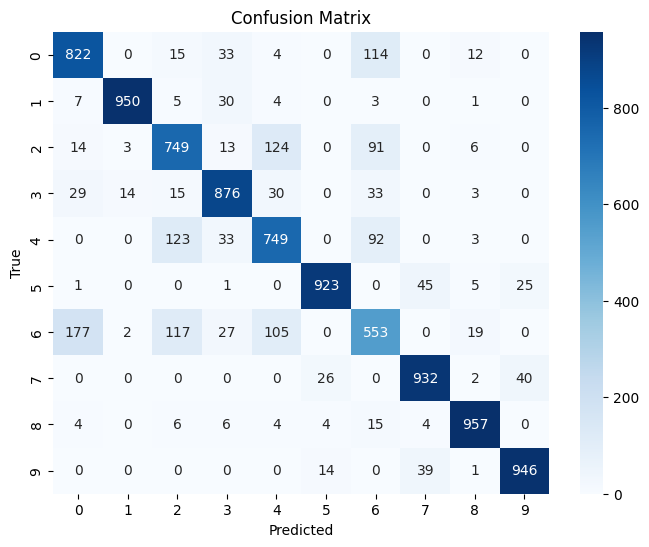

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.73      0.75      0.74      1000
       Dress       0.86      0.88      0.87      1000
        Coat       0.73      0.75      0.74      1000
      Sandal       0.95      0.92      0.94      1000
       Shirt       0.61      0.55      0.58      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.95      0.96      0.95      1000
  Ankle boot       0.94      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Create a MiniSom object
som_size = 10
som = MiniSom(som_size, som_size, x_train.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train(x_train, 10000, random_order=True, verbose=True)

# Get the coordinates of the best-matching units for each sample
bmus = np.array([som.winner(x) for x in x_test])

# Flatten the SOM grid for visualization
flattened_som = np.array([som.winner(x) for x in x_train])

# Plot the SOM grid
plt.figure(figsize=(som_size, som_size))
for i, (x, y) in enumerate(flattened_som):
    plt.text(x, y, str(y_train[i]), color=plt.cm.rainbow(y_train[i] / 10.), fontdict={'weight': 'bold', 'size': 9})
plt.xticks(np.arange(0, som_size, 1))
plt.yticks(np.arange(0, som_size, 1))
plt.grid()
plt.show()

# Perform clustering based on the SOM grid coordinates
cluster_labels = np.ravel_multi_index(bmus.T, (som_size, som_size))

# Create a confusion matrix
cm = confusion_matrix(y_test, cluster_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Display classification report
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
report = classification_report(y_test, cluster_labels, target_names=class_names)
print("Classification Report:\n", report)
